# The Imports

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

# DATA
The Following bank stock data are use for data analysis in this project from the period 01/01/2010-01/01/2021:
- HDFC BANK
- ICIC BANK
- AXIS BANK
- BANK OF BARODA
- KOTAK MAHINDRA BANK
- INDUSIND BANK

In [3]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2021, 1, 1)

In [4]:
#HDFC BANK
HDFC = data.DataReader("HDFCBANK.NS", 'yahoo', start, end)

#ICICI BANK
ICICI = data.DataReader("ICICIBANK.NS", 'yahoo', start, end)

#AXIS BANK
AXIS = data.DataReader("AXISBANK.NS", 'yahoo', start, end)

#BANK OF BARODA
BOB = data.DataReader("BANKBARODA.NS", 'yahoo', start, end)

#KOTAK MAHINDRA BANK
KOTAK = data.DataReader("KOTAKBANK.NS", 'yahoo', start, end)

#INDUSIND BANK
INDUS = data.DataReader("INDUSINDBK.NS", 'yahoo', start, end)

In [5]:
tickers = ['HDFC','ICICI','AXIS','BOB','KOTAK','INDUS']

In [6]:
bank_stocks = pd.concat([HDFC,ICICI,AXIS,BOB,KOTAK,INDUS],axis=1,keys=tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# DATAFRAME

In [8]:
bank_stocks.head()

Bank Ticker        HDFC                                                 \
Stock Info         High         Low        Open       Close     Volume   
Date                                                                     
2010-01-04   172.850006  169.255005  170.000000  170.570007  3050490.0   
2010-01-05   172.500000  170.500000  171.000000  170.720001  8386600.0   
2010-01-06   172.000000  168.809998  171.399994  170.835007  6639840.0   
2010-01-07   176.839996  170.160004  176.839996  171.279999  6123980.0   
2010-01-08   172.339996  170.100006  171.199997  171.505005  7085900.0   

Bank Ticker                   ICICI                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2010-01-04   157.566467  160.909088  159.090912  159.454544  159.945450  ...   
2010-01-05   157.705063  163.590912  160.272720  161.454544  161.463638  ...   
2010-01-06   157.811310  164.972733  161.836365  162.727264  162.699997  ...   
2010-01-07   158.222351  163.045456  159.363632  163.045456  161.163635  ...   
2010-01-08   158.430222  161.818176  158.363632  161.654541  158.899994  ...   

Bank Ticker       KOTAK                                          INDUS  \
Stock Info         Open       Close     Volume   Adj Close        High   
Date                                                                     
2010-01-04   203.274994  205.725006  1105496.0  203.965164  144.800003   
2010-01-05   206.750000  207.762497  1422728.0  205.985229  144.750000   
2010-01-06   208.000000  210.287506  2786040.0  208.488647  147.000000   
2010-01-07   211.250000  212.649994  4160024.0  210.830933  147.000000   
2010-01-08   213.500000  211.337494  1489588.0  209.529633  144.949997   

Bank Ticker                                                             
Stock Info          Low        Open       Close     Volume   Adj Close  
Date                                                                    
2010-01-04   140.050003  140.500000  142.850006  1042676.0  133.712219  
2010-01-05   141.750000  144.699997  142.699997   551413.0  133.571777  
2010-01-06   142.300003  143.899994  146.100006   995851.0  136.754303  
2010-01-07   142.000000  146.000000  142.800003   580803.0  133.665390  
2010-01-08   141.800003  143.199997  142.300003   382686.0  133.197403  

[5 rows x 36 columns]

In [9]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2712 entries, 2010-01-04 to 2021-01-01
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (HDFC, High)        2712 non-null   float64
 1   (HDFC, Low)         2712 non-null   float64
 2   (HDFC, Open)        2712 non-null   float64
 3   (HDFC, Close)       2712 non-null   float64
 4   (HDFC, Volume)      2712 non-null   float64
 5   (HDFC, Adj Close)   2712 non-null   float64
 6   (ICICI, High)       2712 non-null   float64
 7   (ICICI, Low)        2712 non-null   float64
 8   (ICICI, Open)       2712 non-null   float64
 9   (ICICI, Close)      2712 non-null   float64
 10  (ICICI, Volume)     2712 non-null   float64
 11  (ICICI, Adj Close)  2712 non-null   float64
 12  (AXIS, High)        2712 non-null   float64
 13  (AXIS, Low)         2712 non-null   float64
 14  (AXIS, Open)        2712 non-null   float64
 15  (AXIS, Close)       2712 non-null   f

**Max Close price for each bank's stock throughout the time period.**

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
HDFC     1441.800049
ICICI     549.400024
AXIS      822.799988
BOB       225.580002
KOTAK    2017.949951
INDUS    2023.050049
dtype: float64

 **Min Close price for each bank's stock throughout the time period.**

In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Bank Ticker
HDFC     156.740005
ICICI    118.800003
AXIS     156.570007
BOB       36.500000
KOTAK    168.975006
INDUS    137.199997
dtype: float64

 **Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,HDFC Return,ICICI Return,AXIS Return,BOB Return,KOTAK Return,INDUS Return
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.000879,0.009492,0.020865,0.028893,0.009904,-0.001050
2010-01-06,0.000674,0.007657,-0.016785,0.006125,0.012153,0.023826
2010-01-07,0.002605,-0.009443,0.007080,0.005994,0.011235,-0.022587
2010-01-08,0.001314,-0.014046,0.013063,0.004003,-0.006172,-0.003501


 **Creating a pairplot using seaborn of the returns dataframe.**

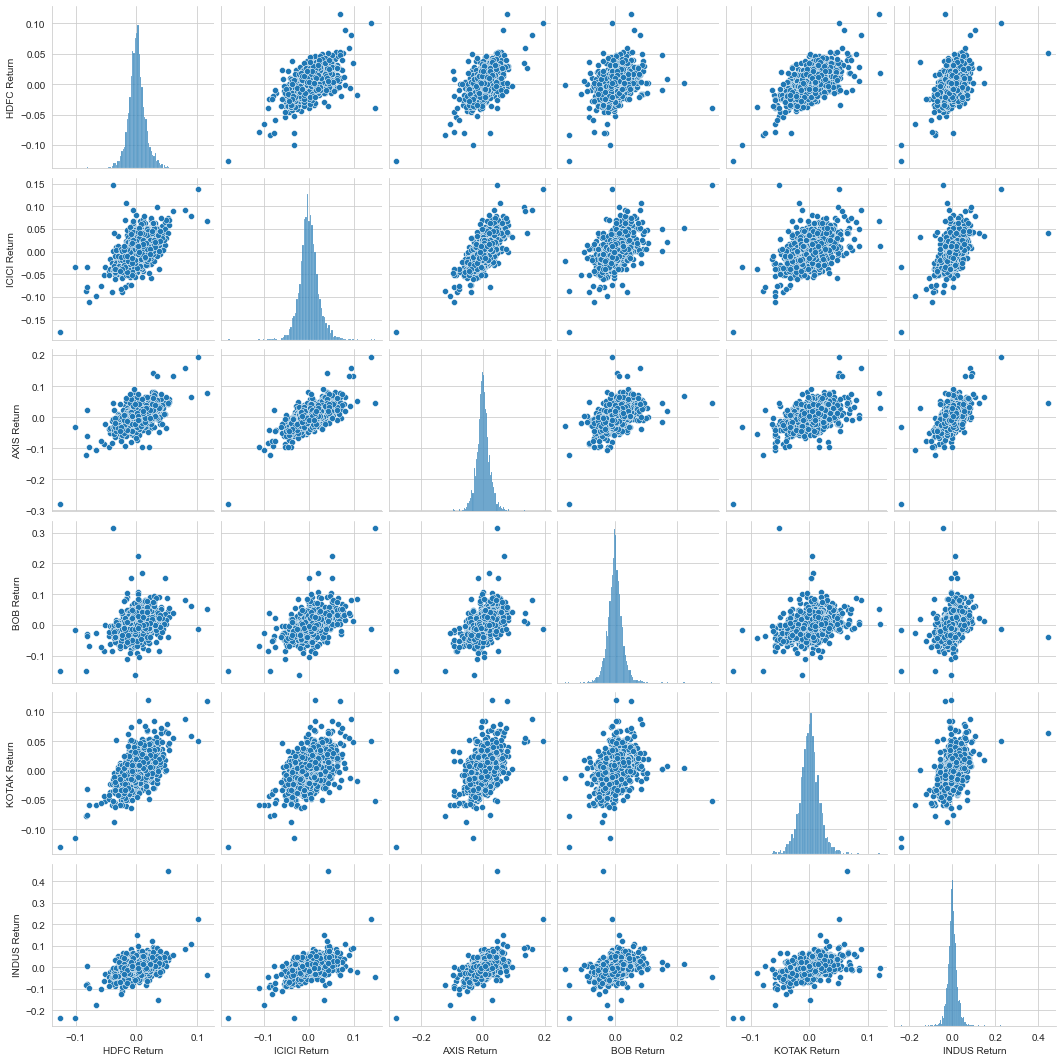

In [15]:
sns.pairplot(returns[1:])

In [16]:
#Drop in single day
returns.idxmin()

HDFC Return    2020-03-23
ICICI Return   2020-03-23
AXIS Return    2020-03-23
BOB Return     2018-09-18
KOTAK Return   2020-03-23
INDUS Return   2020-03-18
dtype: datetime64[ns]

In [17]:
# Best Single Day Gain
returns.idxmax()

HDFC Return    2020-03-25
ICICI Return   2017-10-25
AXIS Return    2020-04-07
BOB Return     2017-10-25
KOTAK Return   2020-10-27
INDUS Return   2020-03-26
dtype: datetime64[ns]

**From standard deviation of return dataframe we can find out which stock is riskist througout the period.**

In [18]:
#All stocks seems to be safe but comparing these 6 stocks BOB has max value,Hence BOB is riskist among these stocks
returns.std()

HDFC Return     0.014859
ICICI Return    0.021700
AXIS Return     0.023084
BOB Return      0.025828
KOTAK Return    0.018306
INDUS Return    0.025641
dtype: float64

In [19]:
#Standard deviation of return in the year of 2010
#Indusind bank seems to be riskist in the year of 2010
returns.loc['2010-01-01':'2010-12-31'].std()

HDFC Return     0.014421
ICICI Return    0.019872
AXIS Return     0.018820
BOB Return      0.016512
KOTAK Return    0.019179
INDUS Return    0.024814
dtype: float64

# Data Visualization

**Distplot using seaborn of the 2020 returns for Bank of Baroda.**

c:\users\swapnil\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='BOB Return', ylabel='Density'>

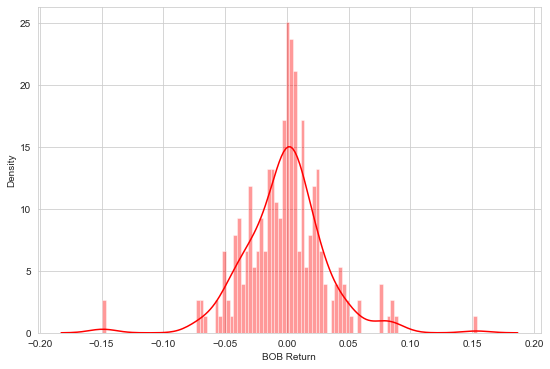

In [20]:
plt.figure(figsize = (9,6))
sns.distplot(returns.loc['2020-01-01':'2020-12-31']['BOB Return'],color='red',bins=100)

**Distplot using seaborn of the 2014 returns for ICICI Bank**

c:\users\swapnil\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='ICICI Return', ylabel='Density'>

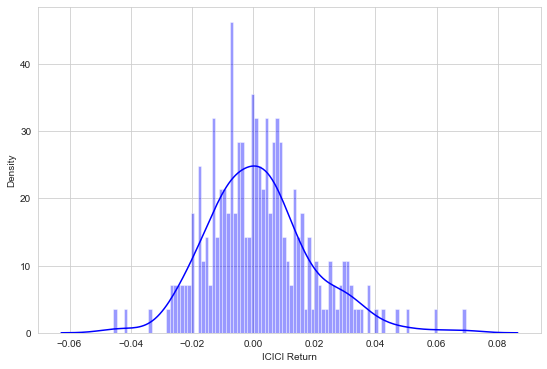

In [21]:
plt.figure(figsize = (9,6))
sns.distplot(returns.loc['2014-01-01':'2014-12-31']['ICICI Return'],color='blue',bins=100)

 **Line plot showing Close price for each bank for the entire index of time.**

<AxesSubplot:xlabel='Date'>

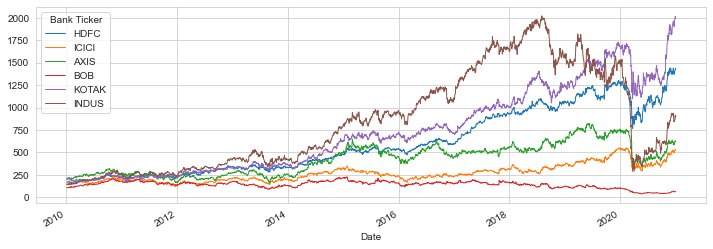

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4),lw=1)

 **line plot showing Close price for each bank for the entire index of time using ploty for interactive plot.**

In [23]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

# Moving Average

**The rolling 30 day average against the Close Price for Kotak Mahindra bank stock for the year 2012.**

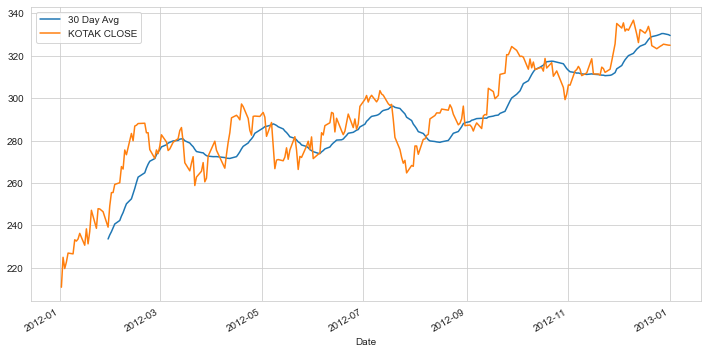

In [24]:
plt.figure(figsize=(12,6))
KOTAK['Close'].loc['2012-01-01':'2013-01-01'].rolling(window=20).mean().plot(label='20 Day Avg')
KOTAK['Close'].loc['2012-01-01':'2013-01-01'].plot(label='KOTAK CLOSE')
plt.legend()

**Heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

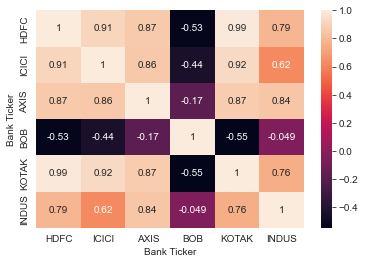

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Clustermap of the correlation between the stocks Close Price.**

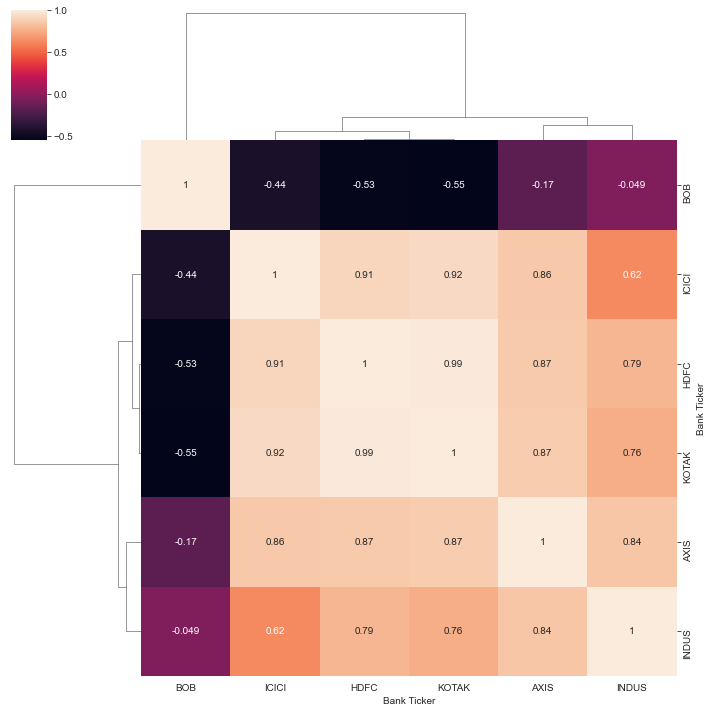

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Data visualization using Ploty and Cufflinks

In [27]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

**Candle stick graph of Indusind bank of year 2020 using plotly**

In [28]:
INDUS[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

**Simple Moving Averages on Axis bank of year 2015 using technical analysis of plotly(.ta_plot()).**

In [29]:
AXIS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[21,44,55],title='Simple Moving Averages')

**Bollinger band on Bank of Baroda stock of year 2016 using technical analysis of ploty(.ta_plot())**

In [30]:
BOB['Close'].loc['2016-01-01':'2017-01-01'].ta_plot(study='boll')